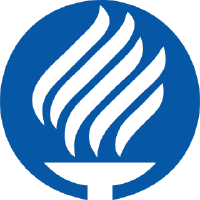

## TC 5033 Deep Learning
## Fully Connected Deep Neural Networks
#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

##TEAM 33
| ID          | Name                          |
|-------------|-------------------------------|
| A01794956   | Luis Oporto                   |
| A00915255   | Ernesto Zapata                |
| A01065270   | José Manuel Romo Peredo       |
| A01795483   | Nicolás Araque                |
| A01794892   | Eduardo Rodriguez Ramirez     |

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


#1. PREPROCESING

In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline

import os
from google.colab import drive

drive.mount('/content/drive')
DIR = "/content/drive/MyDrive/AdvML Eq 33/Actividad 1b/"
os.chdir(DIR)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_PATH = './ASL/'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Load Images

In [ ]:
y_train = np.array(train_df['label'])
y_val_test = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val_test = valid_df.values.astype(np.float32)

In [ ]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into valition and test.
    '''
    x_val, x_test, y_val, y_test = train_test_split(x, y, test_size=pct, shuffle=shuffle)
    return x_val, x_test, y_val, y_test

In [ ]:
x_val, x_test, y_val, y_test = split_val_test(x_val_test, y_val_test)

In [ ]:
###Alphabet

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


## Normalise

In [ ]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [ ]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

# 2.Visual Exploration of ASL Dataset Samples

Before diving into model training, it’s essential to understand the nature of the dataset through visual exploration. This process allows us to:

- Gain insights into the variability of the images.
- Observe differences between the ASL signs for each letter.
- Identify potential challenges like image quality, variations in lighting, or hand positioning.


In this section, we will visualize various examples from the ASL dataset using different plotting functions. This exploration provides a foundation for understanding how the neural network will interpret the input data and what kind of preprocessing or augmentation might be needed.


Plotting Functions and Helpers
This subsection contains utility functions used to visualize the ASL dataset images. These functions help simplify the process of displaying individual images or groups of images from the dataset, enabling us to perform effective visual exploration. Below is a quick description of each function:

- **plot_image(data, labels, index)**: This function plots a single 28x28 grayscale image from the dataset, with the corresponding letter as the title.


- **plot_all_letters(data, labels, num_letters=None, random_seed=None)**: This function plots a grid of randomly selected letters from the dataset. The number of letters to display is customizable, and you can set a random seed for reproducibility.


- **plot_images_for_letter(data, labels, letter, num_letters=None, random_seed=None)**: This function filters the dataset by a specific letter (e.g., 'A') and plots several examples of that letter.


- **plot_one_image_per_label(data, labels)**: This function plots one representative image for each unique label in the dataset, providing an overview of the entire dataset's content.
These helper functions facilitate flexible and efficient exploration of the ASL dataset.

### ASL Dataset Visualization Utilities

In [ ]:
def plot_image(data, labels, index):
    '''
    Plots a single 28x28 grayscale image with the title that indicates the letter it represents.

    Parameters:
    - data: Dataset containing the image data (e.g., x_train, x_val, x_test)
    - labels: Dataset containing the corresponding labels (e.g., y_train, y_val, y_test)
    - index: Index of the image in the dataset
    '''
    # Reshape the image data back into 28x28 format for visualization
    image = data[index].reshape(28, 28)

    # Convert the label to ASCII (A-I: 65-73, K-Y: 75-89 in ASCII)
    label = labels[index]
    if label >= 9:  # Adjust labels for J (label 9 and above)
        ascii_letter = chr(label + 66)  # Skip J (add 1 to adjust for the missing J)
    else:
        ascii_letter = chr(label + 65)  # Labels A-I remain unchanged

    # Plot the image with the corresponding label as title
    plt.imshow(image, cmap='gray')
    plt.title(f"This is the letter: {ascii_letter}")
    plt.axis('off')  # Hide axes for cleaner visualization
    plt.show()

In [ ]:
def plot_all_letters(data, labels, num_letters=None, random_seed=None):
    '''
    Plots a number of random letters in a grid with 10 columns and N rows.

    Parameters:
    - data: Dataset containing the image data (e.g., x_train, x_val, x_test)
    - labels: Dataset containing the corresponding labels (e.g., y_train, y_val, y_test)
    - num_letters: Number of random letters to select and plot (default=all if None)
    - random_seed: Random seed for reproducibility (default=None)
    '''
    # Determine the number of images in the dataset based on the labels size
    dataset_size = labels.shape[0]

    # If num_letters is not provided, default to plotting all images
    if num_letters is None:
        num_letters = dataset_size

    # Ensure that num_letters does not exceed the size of the dataset
    num_letters = min(num_letters, dataset_size)

    # Set the random seed for reproducibility if provided
    if random_seed is not None:
        np.random.seed(random_seed)
    else:
        np.random.seed(0)

    # Randomly select `num_letters` indices from the dataset
    random_indices = np.random.choice(dataset_size, num_letters, replace=False)

    # Determine the number of rows and columns (10 columns per row)
    num_cols = 10
    num_rows = max(1, (num_letters + num_cols - 1) // num_cols)  # Ensure rounding up if num_letters < 10

    # Create a figure with subplots arranged in a grid (num_rows x 10 columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

    # If axes is a single AxesSubplot object, convert it into an array for consistency
    if num_rows == 1:
        axes = np.array(axes).reshape(1, -1)

    # Flatten the axes for easier indexing (regardless of whether it's 1D or 2D)
    axes = axes.flatten()

    # Loop through each random index and plot the corresponding image
    for i, index in enumerate(random_indices):
        image = data[index].reshape(28, 28)  # Reshape the image
        label = labels[index]
        if label >= 9:  # Adjust labels for J (label 9 and above)
            ascii_letter = chr(label + 66)  # Skip J
        else:
            ascii_letter = chr(label + 65)  # Labels A-I remain unchanged

        # Plot the image in the corresponding subplot
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(ascii_letter)
        axes[i].axis('off')  # Hide axes for cleaner visualization

    # Hide unused subplots if num_letters is not a perfect multiple of 10
    for j in range(num_letters, num_rows * num_cols):
        axes[j].axis('off')  # Hide the extra subplots

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_images_for_letter(data, labels, letter, num_letters=None, random_seed=None):
    '''
    Plots a number of images corresponding to a specific letter.

    Parameters:
    - data: Dataset containing the image data (e.g., x_train, x_val, x_test)
    - labels: Dataset containing the corresponding labels (e.g., y_train, y_val, y_test)
    - letter: The letter (char) to filter images by (e.g., 'A' for letter A)
    - num_letters: Number of random images to plot (default=all if None)
    - random_seed: Random seed for reproducibility (default=None)
    '''
    # If the letter is 'J' or 'Z', return without plotting anything
    if letter.upper() in ['J', 'Z']:
        print(f"No images found for the letter {letter}.")
        return

    # Convert the letter to the corresponding label (e.g., 'A' -> 0, 'B' -> 1, etc.)
    letter_label = ord(letter.upper()) - 65

    # Adjust for the missing 'J'
    if letter_label > 8:  # 'J' corresponds to 9 in labels, so skip it
        letter_label -= 1

    # Find all indices in the dataset that match the label
    matching_indices = np.where(labels == letter_label)[0]

    # If there are no matching images, print a message and return
    if len(matching_indices) == 0:
        print(f"No images found for the letter {letter}.")
        return

    # Set the number of images to plot
    if num_letters is None:
        num_letters = len(matching_indices)

    # Ensure num_letters does not exceed the available matching images
    num_letters = min(num_letters, len(matching_indices))

    # Set the random seed for reproducibility if provided
    if random_seed is not None:
        np.random.seed(random_seed)
    else:
        np.random.seed(0)

    # Randomly select `num_letters` from the matching indices
    selected_indices = np.random.choice(matching_indices, num_letters, replace=False)

    # Determine the number of rows and columns (10 columns per row)
    num_cols = 10
    num_rows = max(1, (num_letters + num_cols - 1) // num_cols)  # Ensure rounding up

    # Create a figure with subplots arranged in a grid (num_rows x 10 columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

    # If axes is a single AxesSubplot object, convert it into an array for consistency
    if num_rows == 1:
        axes = np.array(axes).reshape(1, -1)

    # Flatten the axes for easier indexing (regardless of whether it's 1D or 2D)
    axes = axes.flatten()

    # Loop through each selected index and plot the corresponding image
    for i, index in enumerate(selected_indices):
        image = data[index].reshape(28, 28)  # Reshape the image
        label = labels[index]

        # Adjust label to skip 'J' in display
        if label >= 9:
            ascii_letter = chr(label + 66)  # Skip J
        else:
            ascii_letter = chr(label + 65)  # A-I remain unchanged

        # Plot the image in the corresponding subplot
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(ascii_letter)
        axes[i].axis('off')  # Hide axes for cleaner visualization

    # Hide unused subplots if num_letters is not a perfect multiple of 10
    for j in range(num_letters, num_rows * num_cols):
        axes[j].axis('off')  # Hide the extra subplots

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_one_image_per_label(data, labels):
    '''
    Plots one image for each unique label in the dataset.

    Parameters:
    - data: Dataset containing the image data (e.g., x_train, x_val, x_test)
    - labels: Dataset containing the corresponding labels (e.g., y_train, y_val, y_test)
    '''
    # Get unique labels and the index of the first occurrence of each label
    unique_labels, unique_indices = np.unique(labels, return_index=True)

    # Sort the unique labels and indices to ensure correct order (A-Z)
    sorted_indices = np.argsort(unique_labels)
    unique_labels = unique_labels[sorted_indices]
    unique_indices = unique_indices[sorted_indices]

    # Number of unique labels
    num_labels = len(unique_labels)

    # Determine the number of rows and columns (10 columns per row)
    num_cols = 10
    num_rows = max(1, (num_labels + num_cols - 1) // num_cols)  # Ensure rounding up

    # Create a figure with subplots arranged in a grid (num_rows x 10 columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

    # If axes is a single AxesSubplot object, convert it into an array for consistency
    if num_rows == 1:
        axes = np.array(axes).reshape(1, -1)

    # Flatten the axes for easier indexing (regardless of whether it's 1D or 2D)
    axes = axes.flatten()

    # Loop through each unique index and plot the corresponding image
    for i, index in enumerate(unique_indices):
        image = data[index].reshape(28, 28)  # Reshape the image
        label = unique_labels[i]

        # Adjust label to skip 'J' in display
        if label >= 9:
            ascii_letter = chr(label + 66)  # Skip J
        else:
            ascii_letter = chr(label + 65)  # A-I remain unchanged

        # Plot the image in the corresponding subplot
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(ascii_letter)
        axes[i].axis('off')  # Hide axes for cleaner visualization

    # Hide unused subplots if the number of labels is not a perfect multiple of 10
    for j in range(num_labels, num_rows * num_cols):
        axes[j].axis('off')  # Hide the extra subplots

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

### Dataframe images sample visualizations

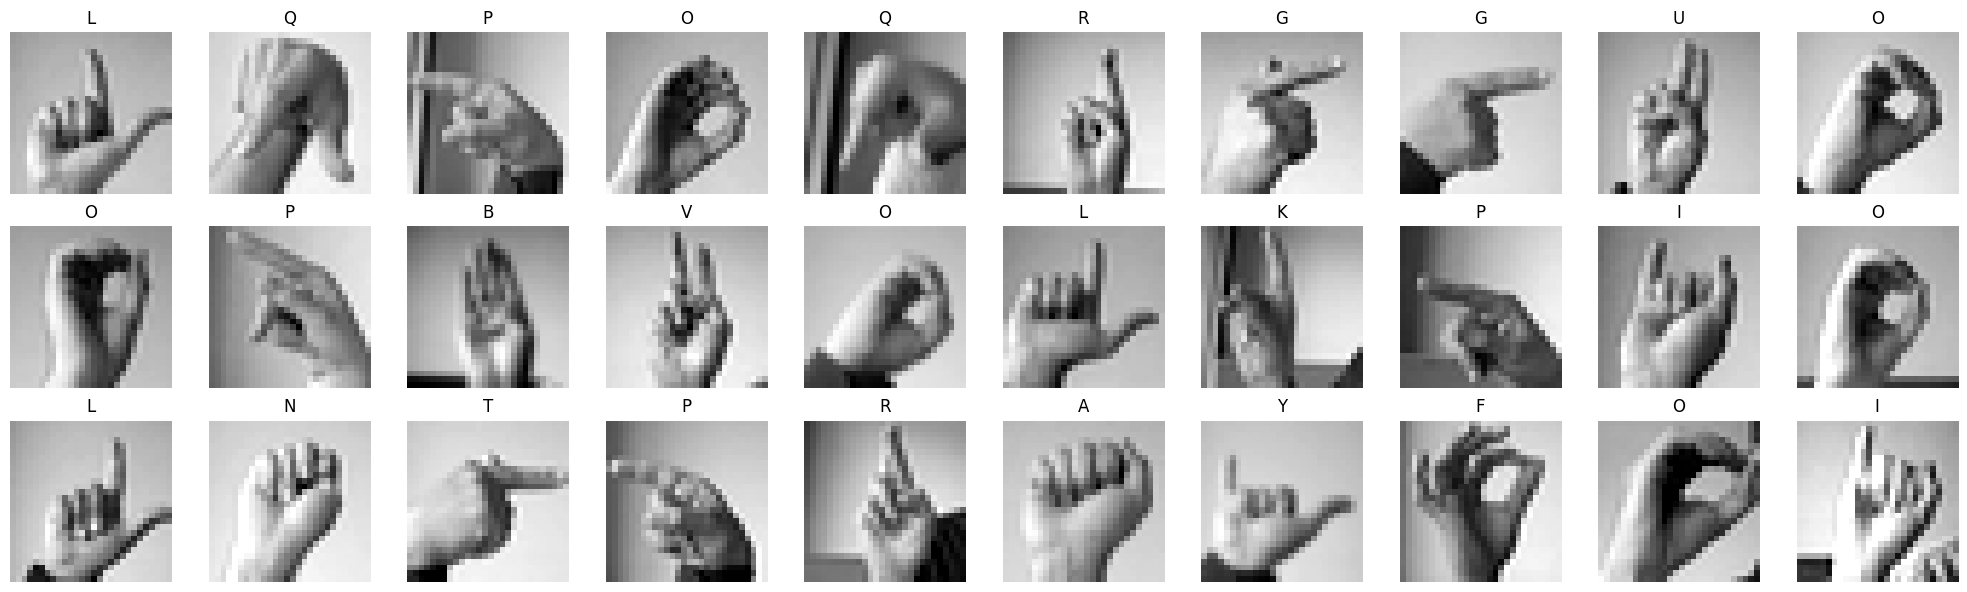

In [ ]:
plot_all_letters(x_train, y_train, num_letters=30, random_seed=50)

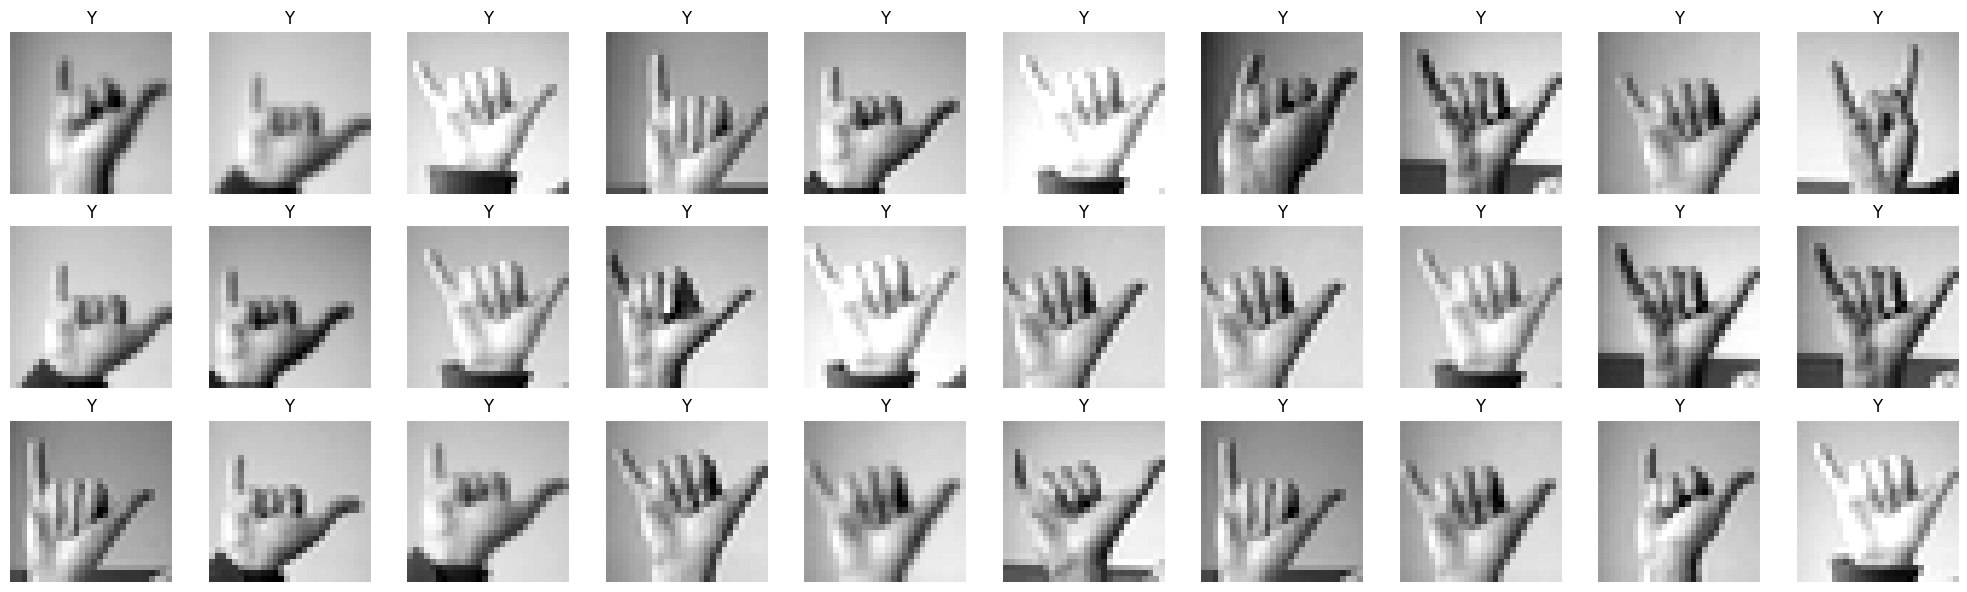

In [ ]:
plot_images_for_letter(x_train, y_train, letter='Y', num_letters=30, random_seed=42)

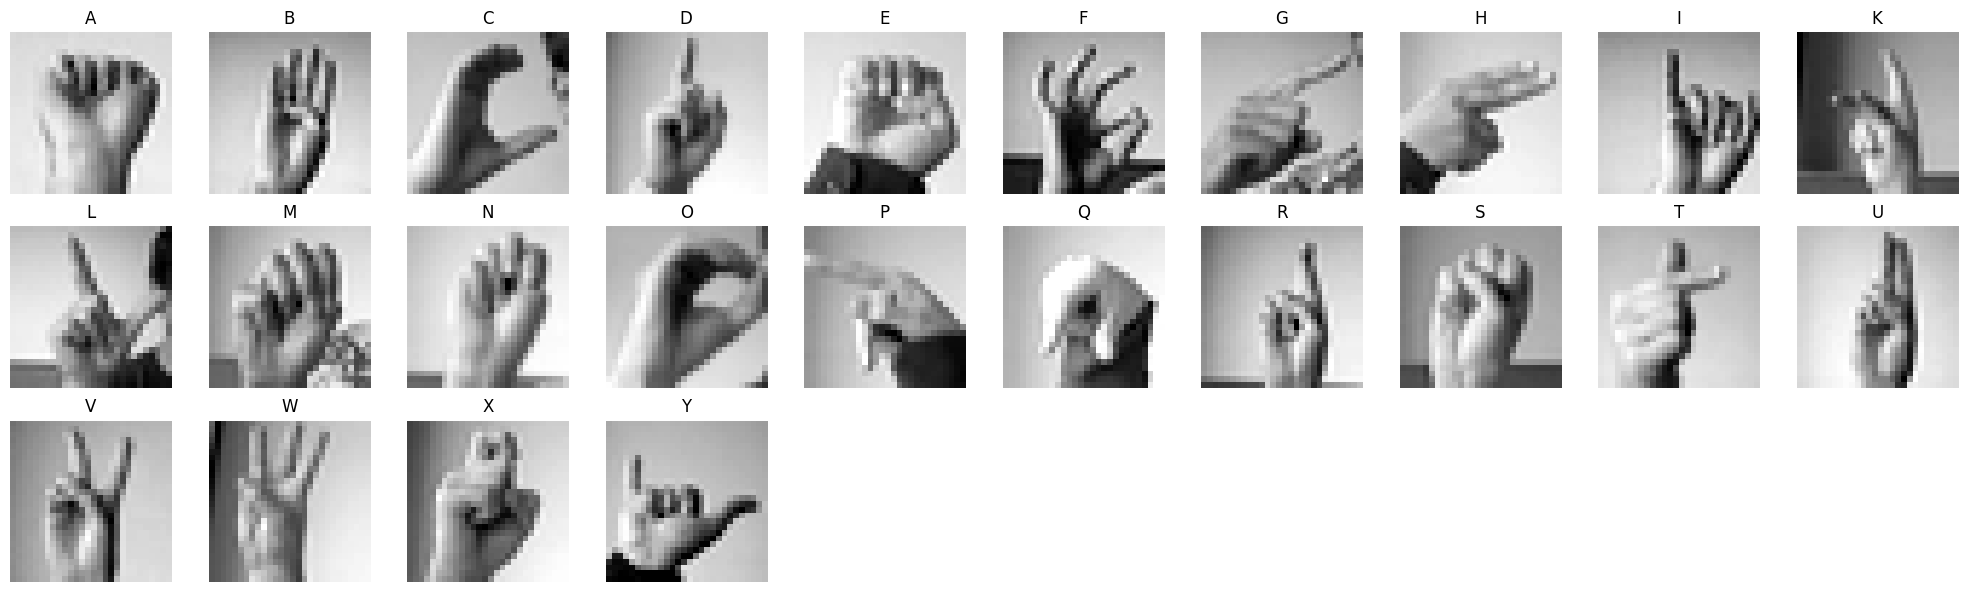

In [ ]:
plot_one_image_per_label(x_train, y_train)

#3. CLASSES AND FUNCTIONS FOR MODELING AND TRAINING

###Equations


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

## Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

##Linear Class

In [ ]:
class np_tensor(np.ndarray): pass

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el foward de la clase lineal
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

## Clase ReLU

In [ ]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

## Clase Sequential

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

## Cost Function

In [ ]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

## Loop de entrenamiento

In [ ]:
def accuracy(x, y, model, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3, verbose = True):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        if verbose:
          print(f'epoch {epoch + 1}/{epochs} => cost: {cost}, accuracy: {accuracy(x_val, y_val, model, mb_size)}')
    return accuracy(x_val, y_val, model, mb_size)
        # if epoch + 1  == epochs:
        #   print(f'epoch {epoch + 1}/{epochs} => cost: {cost}, accuracy: {accuracy(x_val, y_val, model, mb_size)}')

#4. ARQUITECTURE SELECTION


For the architecture selection we porpose a structured approach to evaluate the performance of different neural network configurations.

Specifically, two types of architectures will be explored: **one hidden layer** and **two hidden layers**. Each of these configurations will be tested with different hidden layer sizes to evaluate which apporach is better for this use case.

We selected hyperparameters arbitrarely and they will be consistent across all models, to assess the effect of the architectural choice.

This approach will allow for a detailed comparison of model complexity and generalization. The systematic evaluation of both depth (number of layers) and width (size of layers) will provide insights into the optimal architecture for the given dataset, balancing accuracy with model efficiency and robustness to overfitting.

##Single hidden layer

In [ ]:
mb_size = 256
learning_rate = 1e-4
epochs = 20

sizes=[600,500,400,300,200,100]

models = []

for s in sizes:
  models.append(Sequential_layers([Linear(784, s), ReLU(), Linear(s, 24)]))

In [ ]:
for i, m in enumerate(models):
  print(f"-------------Training model {i+1} ({sizes[i]} neurons)----------")
  train(m, epochs, mb_size, learning_rate)
  print(f"Accuray on test dataset: {accuracy(x_test, y_test, m, mb_size)}")

Single layer results

| Model | Neurons | Training Set Accuracy | Test Set Accuracy |
|-------|---------|-----------------------|-------------------|
| 1     | 600     | 0.741                 | 0.752             |
| 2     | 500     | 0.758                 | 0.760             |
| 3     | 400     | 0.754                 | 0.757             |
| 4     | 300     | 0.764                 | 0.774             |
| 5     | 200     | 0.766                 | 0.775             |
| 6     | 100     | 0.769                 | 0.767             |

##Two hidden layers

In [ ]:
sizes_two_hidden = [[700,100],[700,200],[700,300],[600,100],[600,200],[600,300],[500,100],[500,200],[500,300]]

models_two_hidden = []

for [l1,l2] in sizes_two_hidden:
  models_two_hidden.append(Sequential_layers([Linear(784, l1), ReLU(), Linear(l1, l2), ReLU(), Linear(l2, 24)]))

In [ ]:
for i, m in enumerate(models_two_hidden):
  print(f"-------------Training model {i+1} l1:{sizes_two_hidden[i][0]} l2:{sizes_two_hidden[i][1]} neurons----------")
  train(m, epochs, mb_size, learning_rate)
  print(f"Accuray on test dataset: {accuracy(x_test, y_test, m, mb_size)}")

Two hidden layers results

| Model | Layer 1 | Layer 2 | Training Set Accuracy | Test Set Accuracy |
|-------|---------|---------|-----------------------|-------------------|
| 1     | 700     | 100     | 0.767                 | 0.776             |
| 2     | 700     | 200     | 0.765                 | 0.769             |
| 3     | 700     | 300     | 0.767                 | 0.775             |
| 4     | 600     | 100     | 0.768                 | 0.775             |
| 5     | 600     | 200     | 0.773                 | 0.778             |
| 6     | 600     | 300     | 0.770                 | 0.782             |
| ***7***     | ***500***     | ***100***     | ***0.791***                 | ***0.796***             |
| 8     | 500     | 200     | 0.756                 | 0.764             |
| 9     | 500     | 300     | 0.774                 | 0.776             |

>As the results show, the two-hidden-layer architecture performs slightly better than the single-layer models, with Model 7 (featuring 500 and 100 neurons, respectively) achieving the best performance. It's important to note that, when comparing the accuracy on the validation and test datasets, there is no evidence of overfitting in the models.

#5. HYPERPARAMETERS TUNNING

In [ ]:
import itertools
def grid_search_train(train_func, model, epochs_list, mb_size_list, learning_rate_list):

    param_grid = list(itertools.product(epochs_list, mb_size_list, learning_rate_list))

    best_model = None
    best_accuracy = 0
    best_params = None

    for (epochs, mb_size, learning_rate) in param_grid:
        print(f"Training with params: epochs={epochs}, mb_size={mb_size}, learning_rate={learning_rate}")

        accuracy = train_func(model, epochs, mb_size, learning_rate, False)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = (epochs, mb_size, learning_rate)
            best_model = model

        print(f"Accuracy: {accuracy}, Best Accuracy: {best_accuracy}")

    print(f"Best parameters: epochs={best_params[0]}, mb_size={best_params[1]}, learning_rate={best_params[2]}")
    return best_model, best_params, best_accuracy

In [ ]:
selected_model = models_two_hidden[6]

epochs_list = [10, 15, 20]
mb_size_list = [128, 256, 512]
learning_rate_list = [1e-4, 5e-4, 1e-3]


best_model, best_params, best_accuracy = grid_search_train(train, selected_model, epochs_list, mb_size_list, learning_rate_list)


Training with params: epochs=10, mb_size=128, learning_rate=0.0001
Accuracy: 0.7679866146123815, Best Accuracy: 0.7679866146123815
Training with params: epochs=10, mb_size=128, learning_rate=0.0005
Accuracy: 0.7852760736196319, Best Accuracy: 0.7852760736196319
Training with params: epochs=10, mb_size=128, learning_rate=0.001
Accuracy: 0.7894590072504183, Best Accuracy: 0.7894590072504183
Training with params: epochs=10, mb_size=256, learning_rate=0.0001
Accuracy: 0.7889012827663134, Best Accuracy: 0.7894590072504183
Training with params: epochs=10, mb_size=256, learning_rate=0.0005
Accuracy: 0.7900167317345231, Best Accuracy: 0.7900167317345231
Training with params: epochs=10, mb_size=256, learning_rate=0.001
Accuracy: 0.7908533184606804, Best Accuracy: 0.7908533184606804
Training with params: epochs=10, mb_size=512, learning_rate=0.0001
Accuracy: 0.7902955939765756, Best Accuracy: 0.7908533184606804
Training with params: epochs=10, mb_size=512, learning_rate=0.0005
Accuracy: 0.790295

In [ ]:
print(f"Accuray on test dataset: {accuracy(x_test, y_test, best_model, best_params[1])}")

Accuray on test dataset: 0.7939208031232571


#6. MODEL TESTING

##Ploting funcitons

In [ ]:
def plot_predictions_grid(data, labels, preds, num_letters=None, random_seed=None):
    '''
    Plots a grid of random images showing both the model's prediction and the true label.

    Parameters:
    - data: Dataset containing the image data (e.g., x_val, x_test)
    - labels: Dataset containing the corresponding true labels (e.g., y_val, y_test)
    - preds: Model predictions corresponding to the data
    - num_letters: Number of random letters to select and plot (default=all if None)
    - random_seed: Random seed for reproducibility (default=None)
    '''
    # Determine the number of images in the dataset
    dataset_size = labels.shape[0]

    # If num_letters is not provided, default to plotting all images
    if num_letters is None:
        num_letters = dataset_size

    # Ensure that num_letters does not exceed the size of the dataset
    num_letters = min(num_letters, dataset_size)

    # Set the random seed for reproducibility if provided
    if random_seed is not None:
        np.random.seed(random_seed)
    else:
        np.random.seed(0)

    # Randomly select `num_letters` indices from the dataset
    random_indices = np.random.choice(dataset_size, num_letters, replace=False)

    # Determine the number of rows and columns (10 columns per row)
    num_cols = 10
    num_rows = max(1, (num_letters + num_cols - 1) // num_cols)  # Ensure rounding up if num_letters < 10

    # Create a figure with subplots arranged in a grid (num_rows x 10 columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))

    # If axes is a single AxesSubplot object, convert it into an array for consistency
    if num_rows == 1:
        axes = np.array(axes).reshape(1, -1)

    # Flatten the axes for easier indexing (regardless of whether it's 1D or 2D)
    axes = axes.flatten()

    # Loop through each random index and plot the corresponding image
    for i, index in enumerate(random_indices):
        image = data[index].reshape(28, 28)  # Reshape the image
        true_label = labels[index]
        pred_label = preds[index]

        # Convert labels to ASCII (A-Z)
        ascii_true = chr(true_label + 65)
        ascii_pred = chr(pred_label + 65)

        # Plot the image with both predicted and true label as title
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"Model prediction: {ascii_pred}\nReal value: {ascii_true}")
        axes[i].axis('off')  # Hide axes for cleaner visualization

    # Hide unused subplots if num_letters is not a perfect multiple of 10
    for j in range(num_letters, num_rows * num_cols):
        axes[j].axis('off')  # Hide the extra subplots

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

    # Return the indices used in the grid for precision calculation
    return random_indices

In [ ]:
def calculate_precision(labels, preds, grid_indices):
    '''
    Calculates and prints the precision (accuracy) both for the entire dataset and for the grid.

    Parameters:
    - labels: Dataset containing the true labels (e.g., y_val, y_test)
    - preds: Model predictions corresponding to the dataset
    - grid_indices: Indices of the samples used in the grid (returned from plot_predictions_grid)
    '''
    # Calculate precision for the entire dataset
    overall_precision = np.sum(preds == labels) / labels.shape[0]

    # Calculate precision for the grid
    correct_in_grid = np.sum(preds[grid_indices] == labels[grid_indices])
    grid_precision = correct_in_grid / len(grid_indices)

    # Print precision results
    print(f"Precision within the grid: {grid_precision:.2%}")
    print(f"Overall precision on the entire dataset: {overall_precision:.2%}")


##Model testing

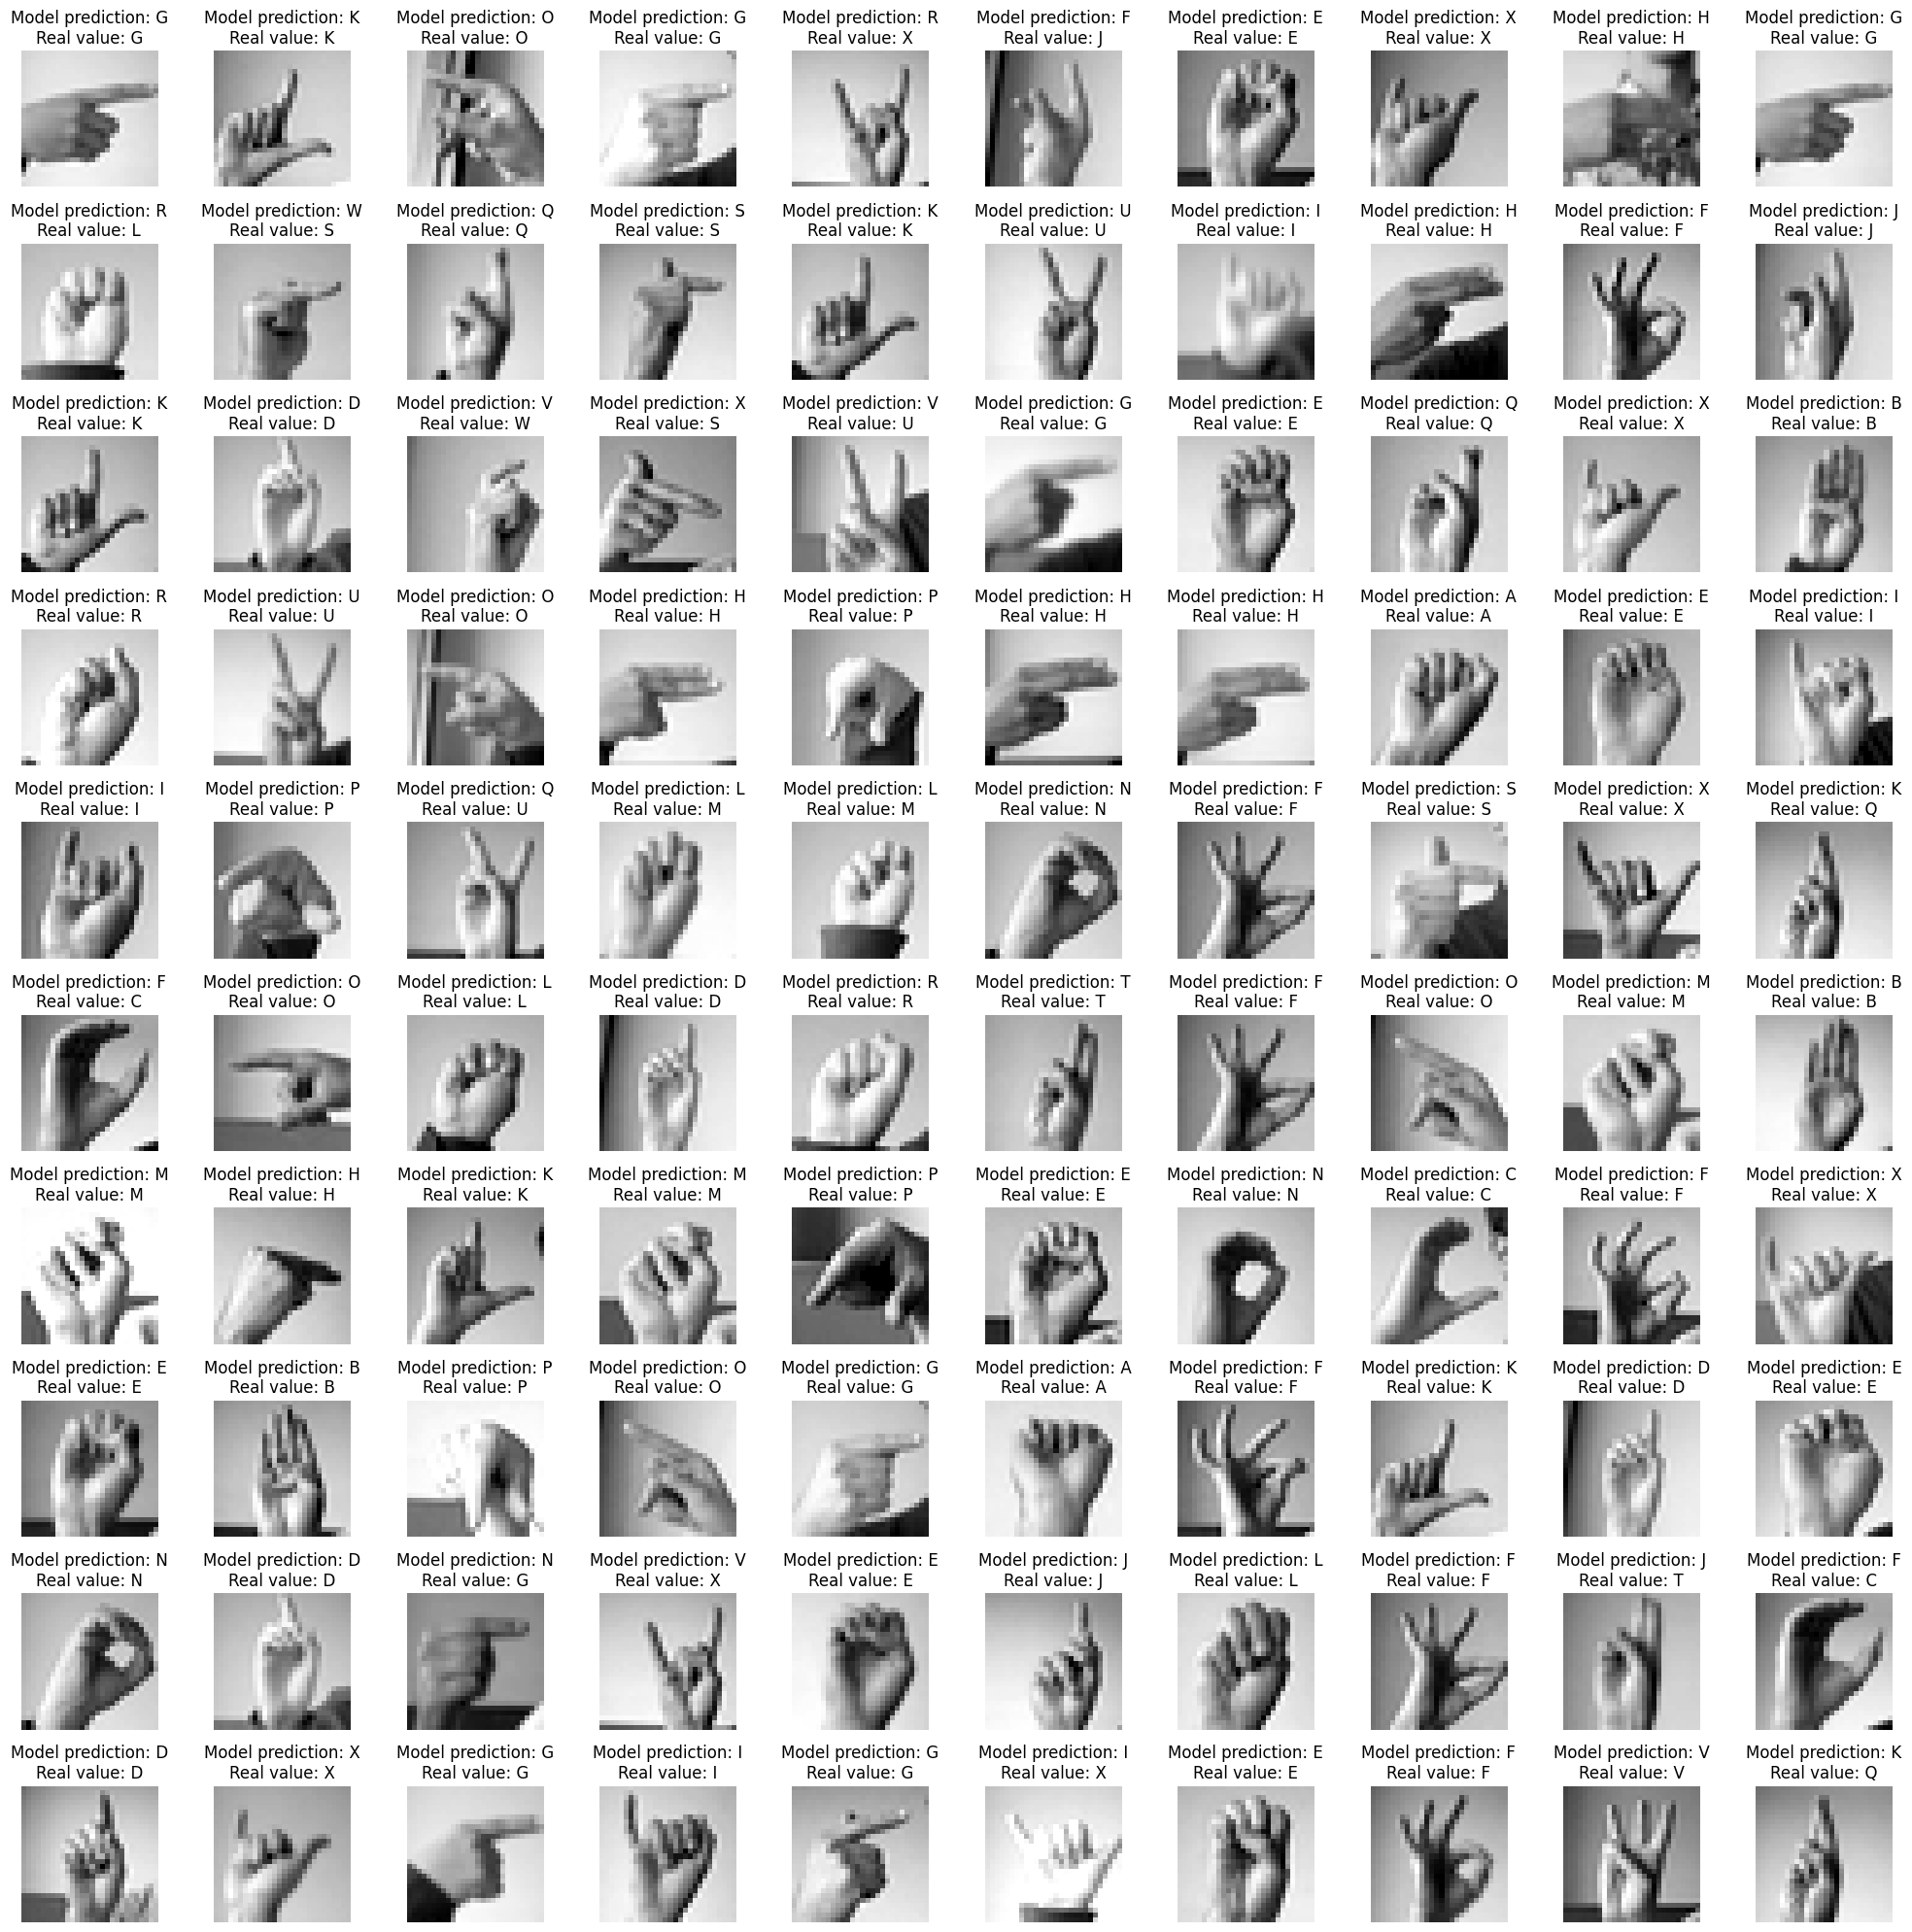

Precision within the grid: 82.00%
Overall precision on the entire dataset: 79.39%


In [ ]:
preds = np.argmax(best_model(x_test.T.view(np_tensor)), axis=0)

grid_indices = plot_predictions_grid(x_test, y_test, preds, num_letters=100, random_seed=21)

calculate_precision(y_test, preds, grid_indices)

Precision within the grid: 82.00%
Overall precision on the entire dataset: 79.39%

#7. CONCLUSIONS

The present study has demonstrated that the machine learning model developed is effective, achieving an accuracy of **82%** in the evaluation grid and an overall accuracy of **79.73%** on the dataset.

These results indicate that the model meets the objectives initially set and performs satisfactorily in the classification of the analyzed data. However, to improve the model's performance, the following strategies are recommended:

- **Hyperparameter tuning**: Optimizing parameters such as learning rate, the number of epochs, and the neural network architecture can lead to improvements in the model's accuracy.
  
- **Class balancing**: If the dataset presents class imbalance, it is advisable to apply balancing techniques, such as oversampling minority classes or undersampling majority classes, to avoid the model being biased towards the more frequent classes.

- **Exploring advanced architectures**: Evaluating the use of more complex models, such as deep neural networks or pretrained models, could enhance the model's ability to capture patterns in the data.

- **Cross-validation**: Implementing techniques like K-Fold cross-validation can help assess the model's generalization and detect potential overfitting issues.

By adopting these measures, it is possible to improve the model's accuracy and robustness, contributing to more reliable and applicable results in practical contexts.